# Multi GPU Analysis analysis on multiple GPU's

# System Configuration for running DDP with multiple GPU's

## System Specifications
- **Operating System**: Linux #1 SMP Wed Apr 28 21:49:45 UTC 2021
- **Python Version**: 3.8.20
- **CPU Cores**: 28 (28 Physical)
- **System Memory**: 503.64 GB
- **Memory Usage**: 3.4%

## PyTorch Environment
- **PyTorch Version**: 1.13.1
- **CUDA Support**: Enabled

## CUDA Configuration
- **CUDA Version**: 11.6
- **Total GPUs**: 4
- **Current Device**: GPU 0

## Available GPUs
### GPU 0 (Tesla K80)
- Total Memory: 11.17 GB
- Compute Capability: 3.7

### GPU 1 (Tesla K80)
- Total Memory: 11.17 GB
- Compute Capability: 3.7

### GPU 2 (Tesla K80)
- Total Memory: 11.17 GB
- Compute Capability: 3.7

### GPU 3 (Tesla K80)
- Total Memory: 11.17 GB
- Compute Capability: 3.7

# Distributed Training Configuration for Lane Detection

## Dataset Configuration
- **Path**: `/home/rebbapragada.s/.cache/kagglehub/datasets/manideep1108/tusimple/versions/5/TUSimple`
- **Image Size**: [800, 360]
- **Batch Size**: 8 (Total across all GPUs)
- **Number of Workers**: 4 (Per GPU)

## Model Configuration
- **Model Name**: LaneDetectionModel
- **Number of Classes**: 2
- **Backbone**: ResNet18
- **Pretrained**: Yes

## Training Configuration
- **Epochs**: 1
- **Base Learning Rate**: 0.0005
- **Weight Decay**: 0.0001
- **Optimizer**: AdamW

## System Configuration
- **Device**: CUDA
- **Pin Memory**: False  --- had to disable because ran it on k80

## Distributed Training Configuration
- **Backend**: NCCL  --- because GPU
- **Initialization Method**: env://
- **World Size**: ____ passing it as args
- **Synchronized Batch Normalization**: True
- **Find Unused Parameters**: False

## Optimization Configuration
- **cuDNN Benchmark**: False --- had to disable because ran it on k80
- **Mixed Precision**: False --- had to disable because ran it on k80
- **Memory Efficient**: True
- **Gradient Accumulation Steps**: 2
- **Gradient Clipping**: 0.5
- **Scale Learning Rate**: True (with number of GPUs)


# Results for multi GPU's DDP
## 4 K80 GPU
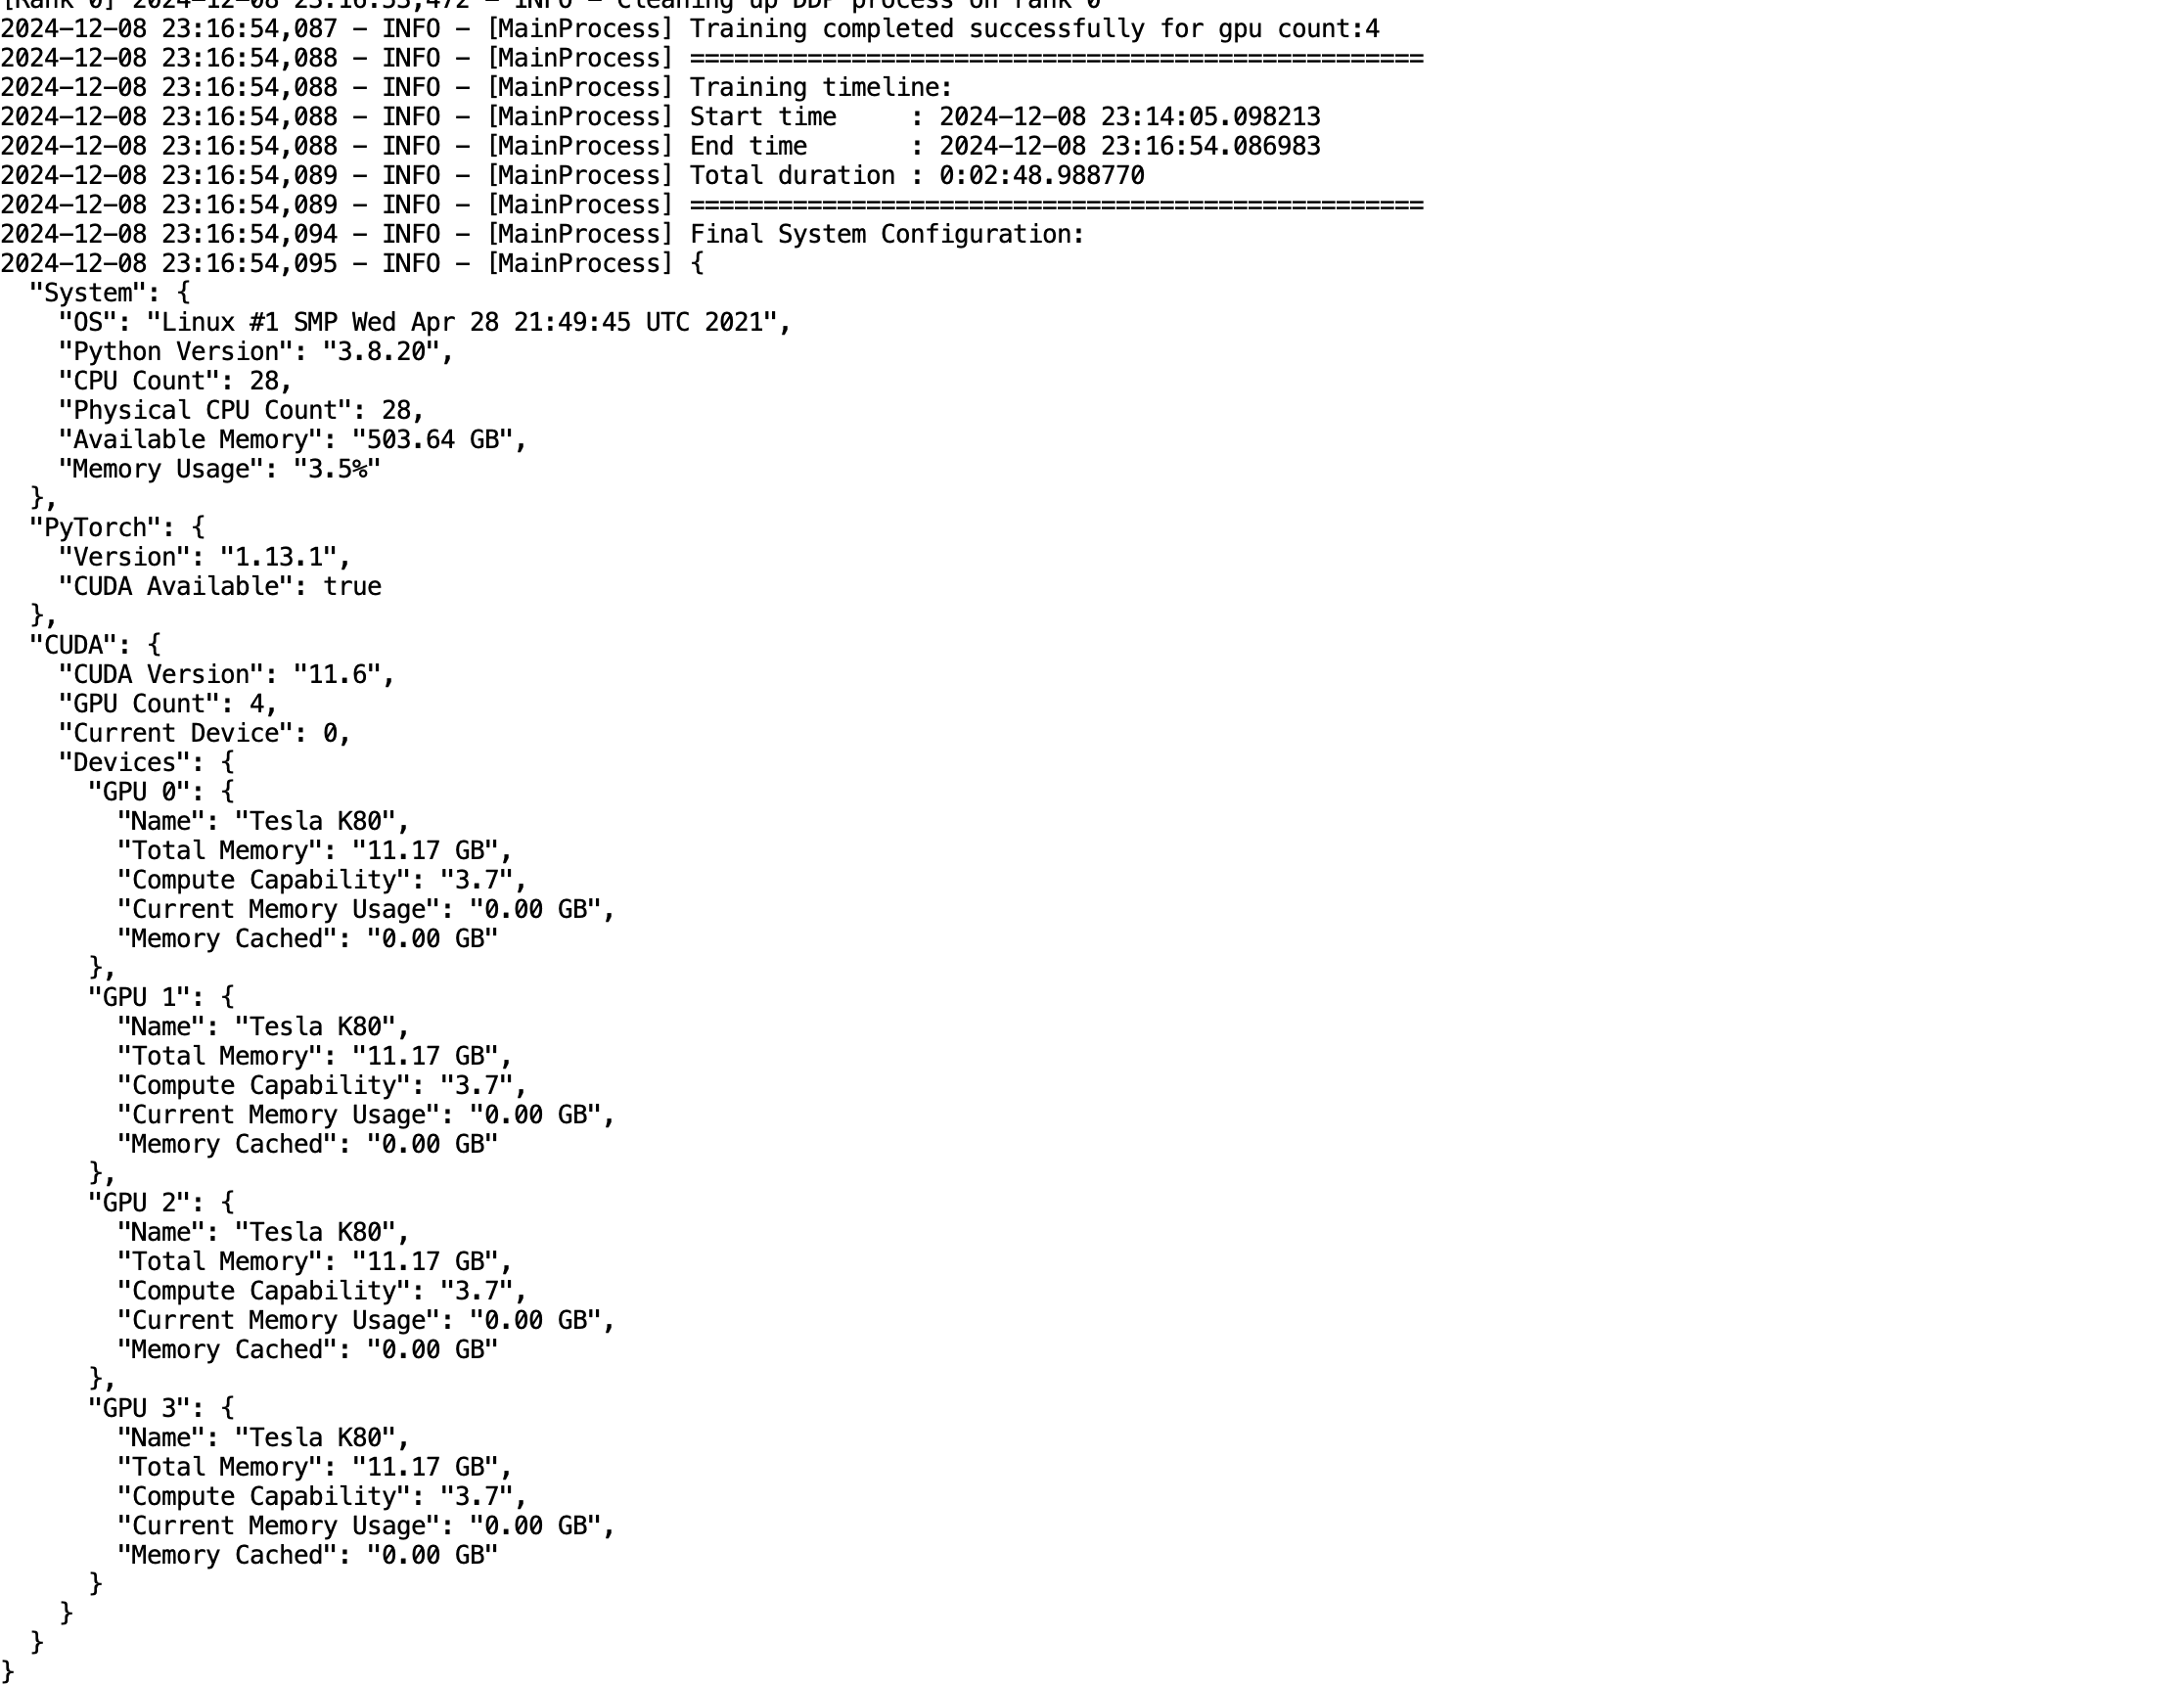
## 3 K80 GPU
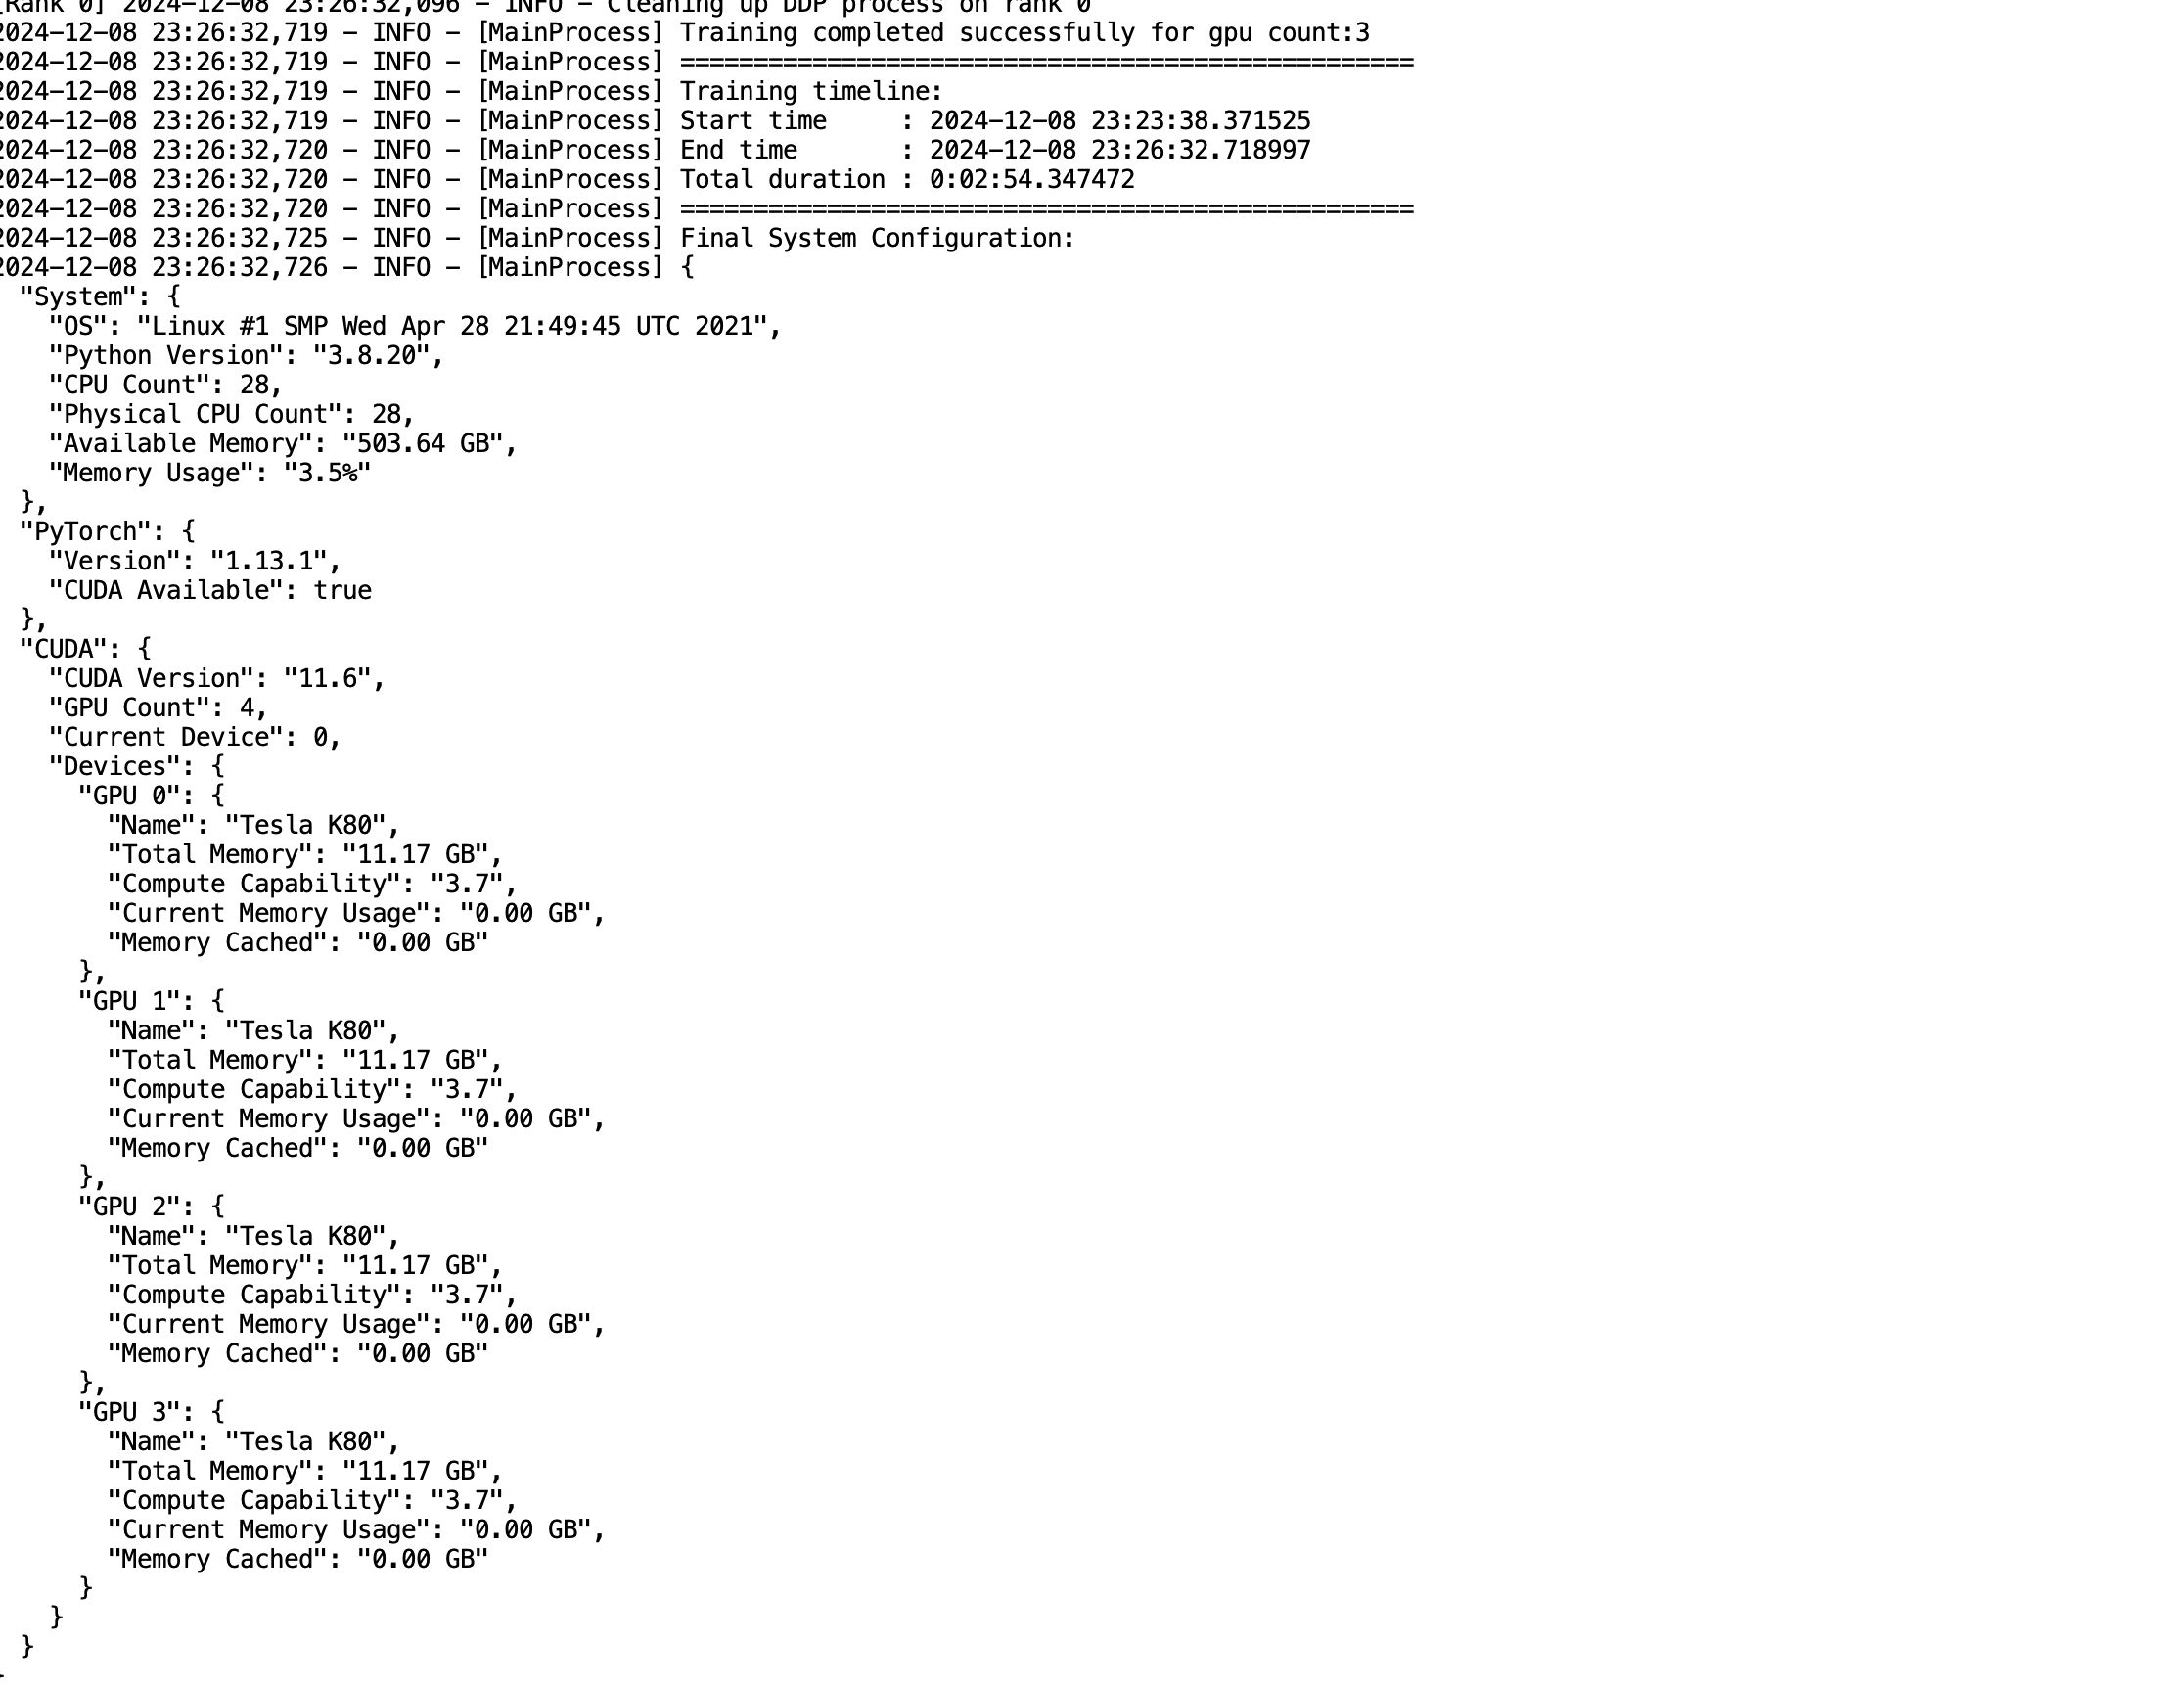
## 2 K80 GPU
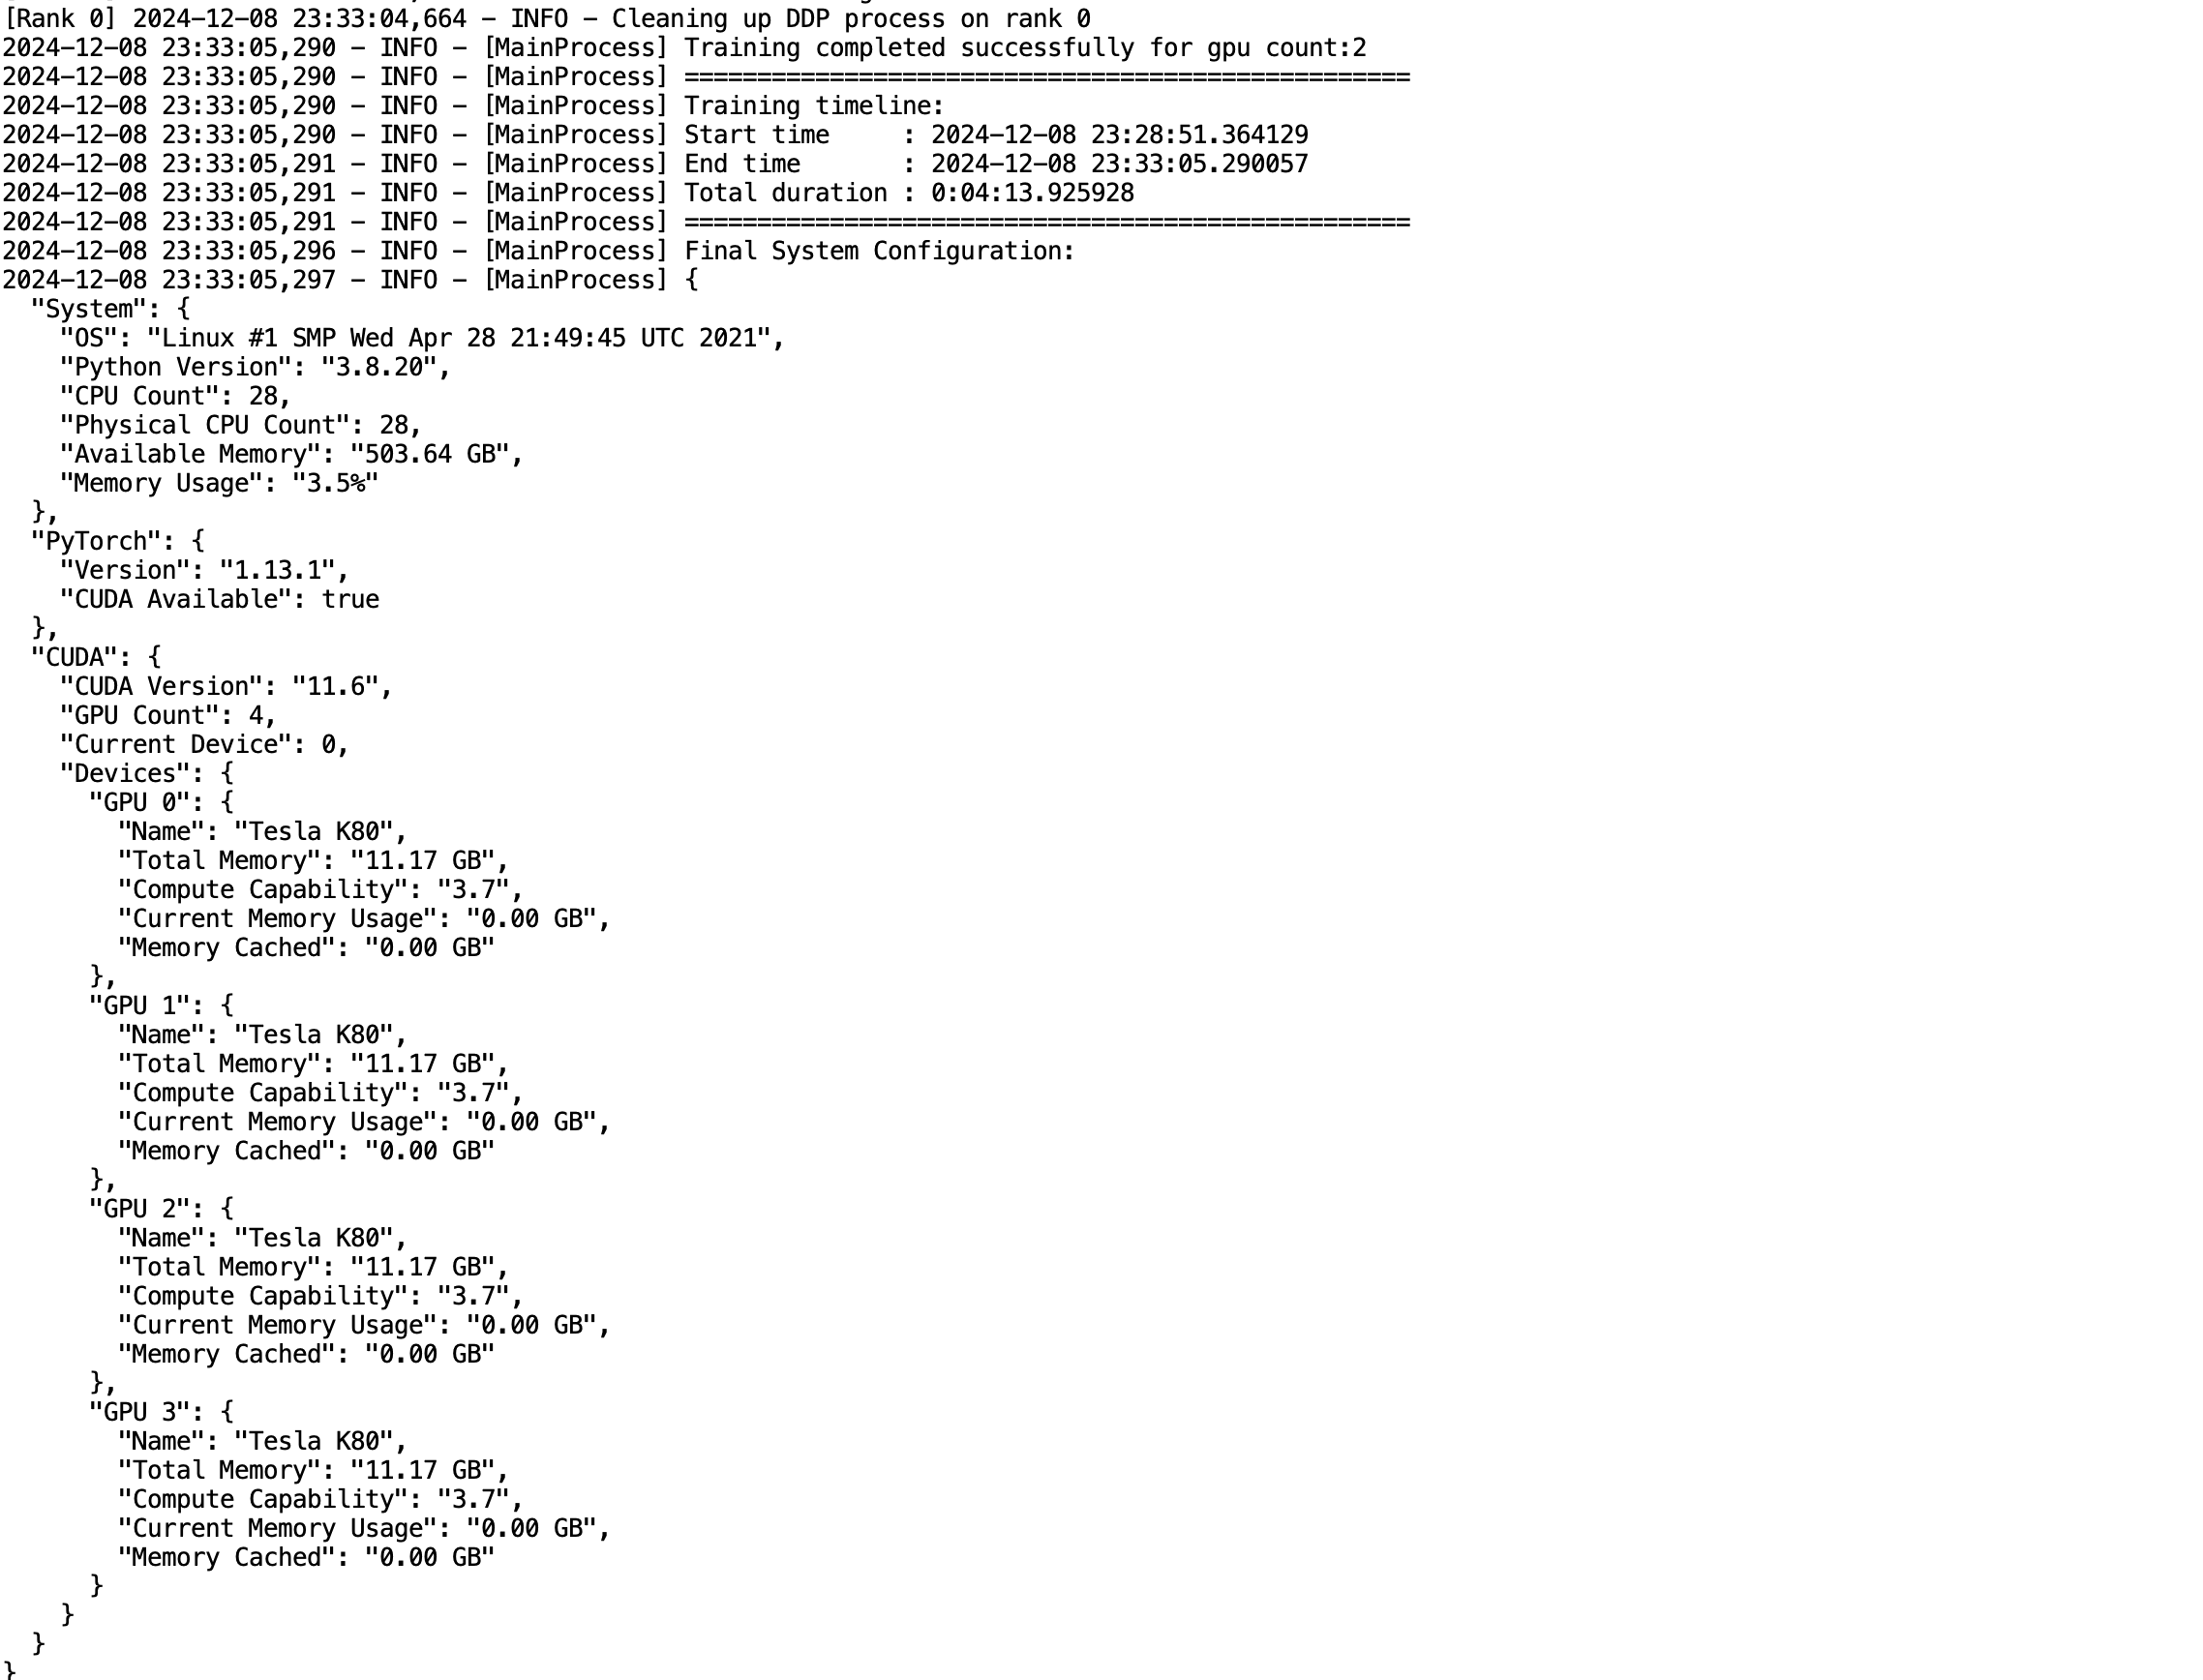
## 1 K80 GPU
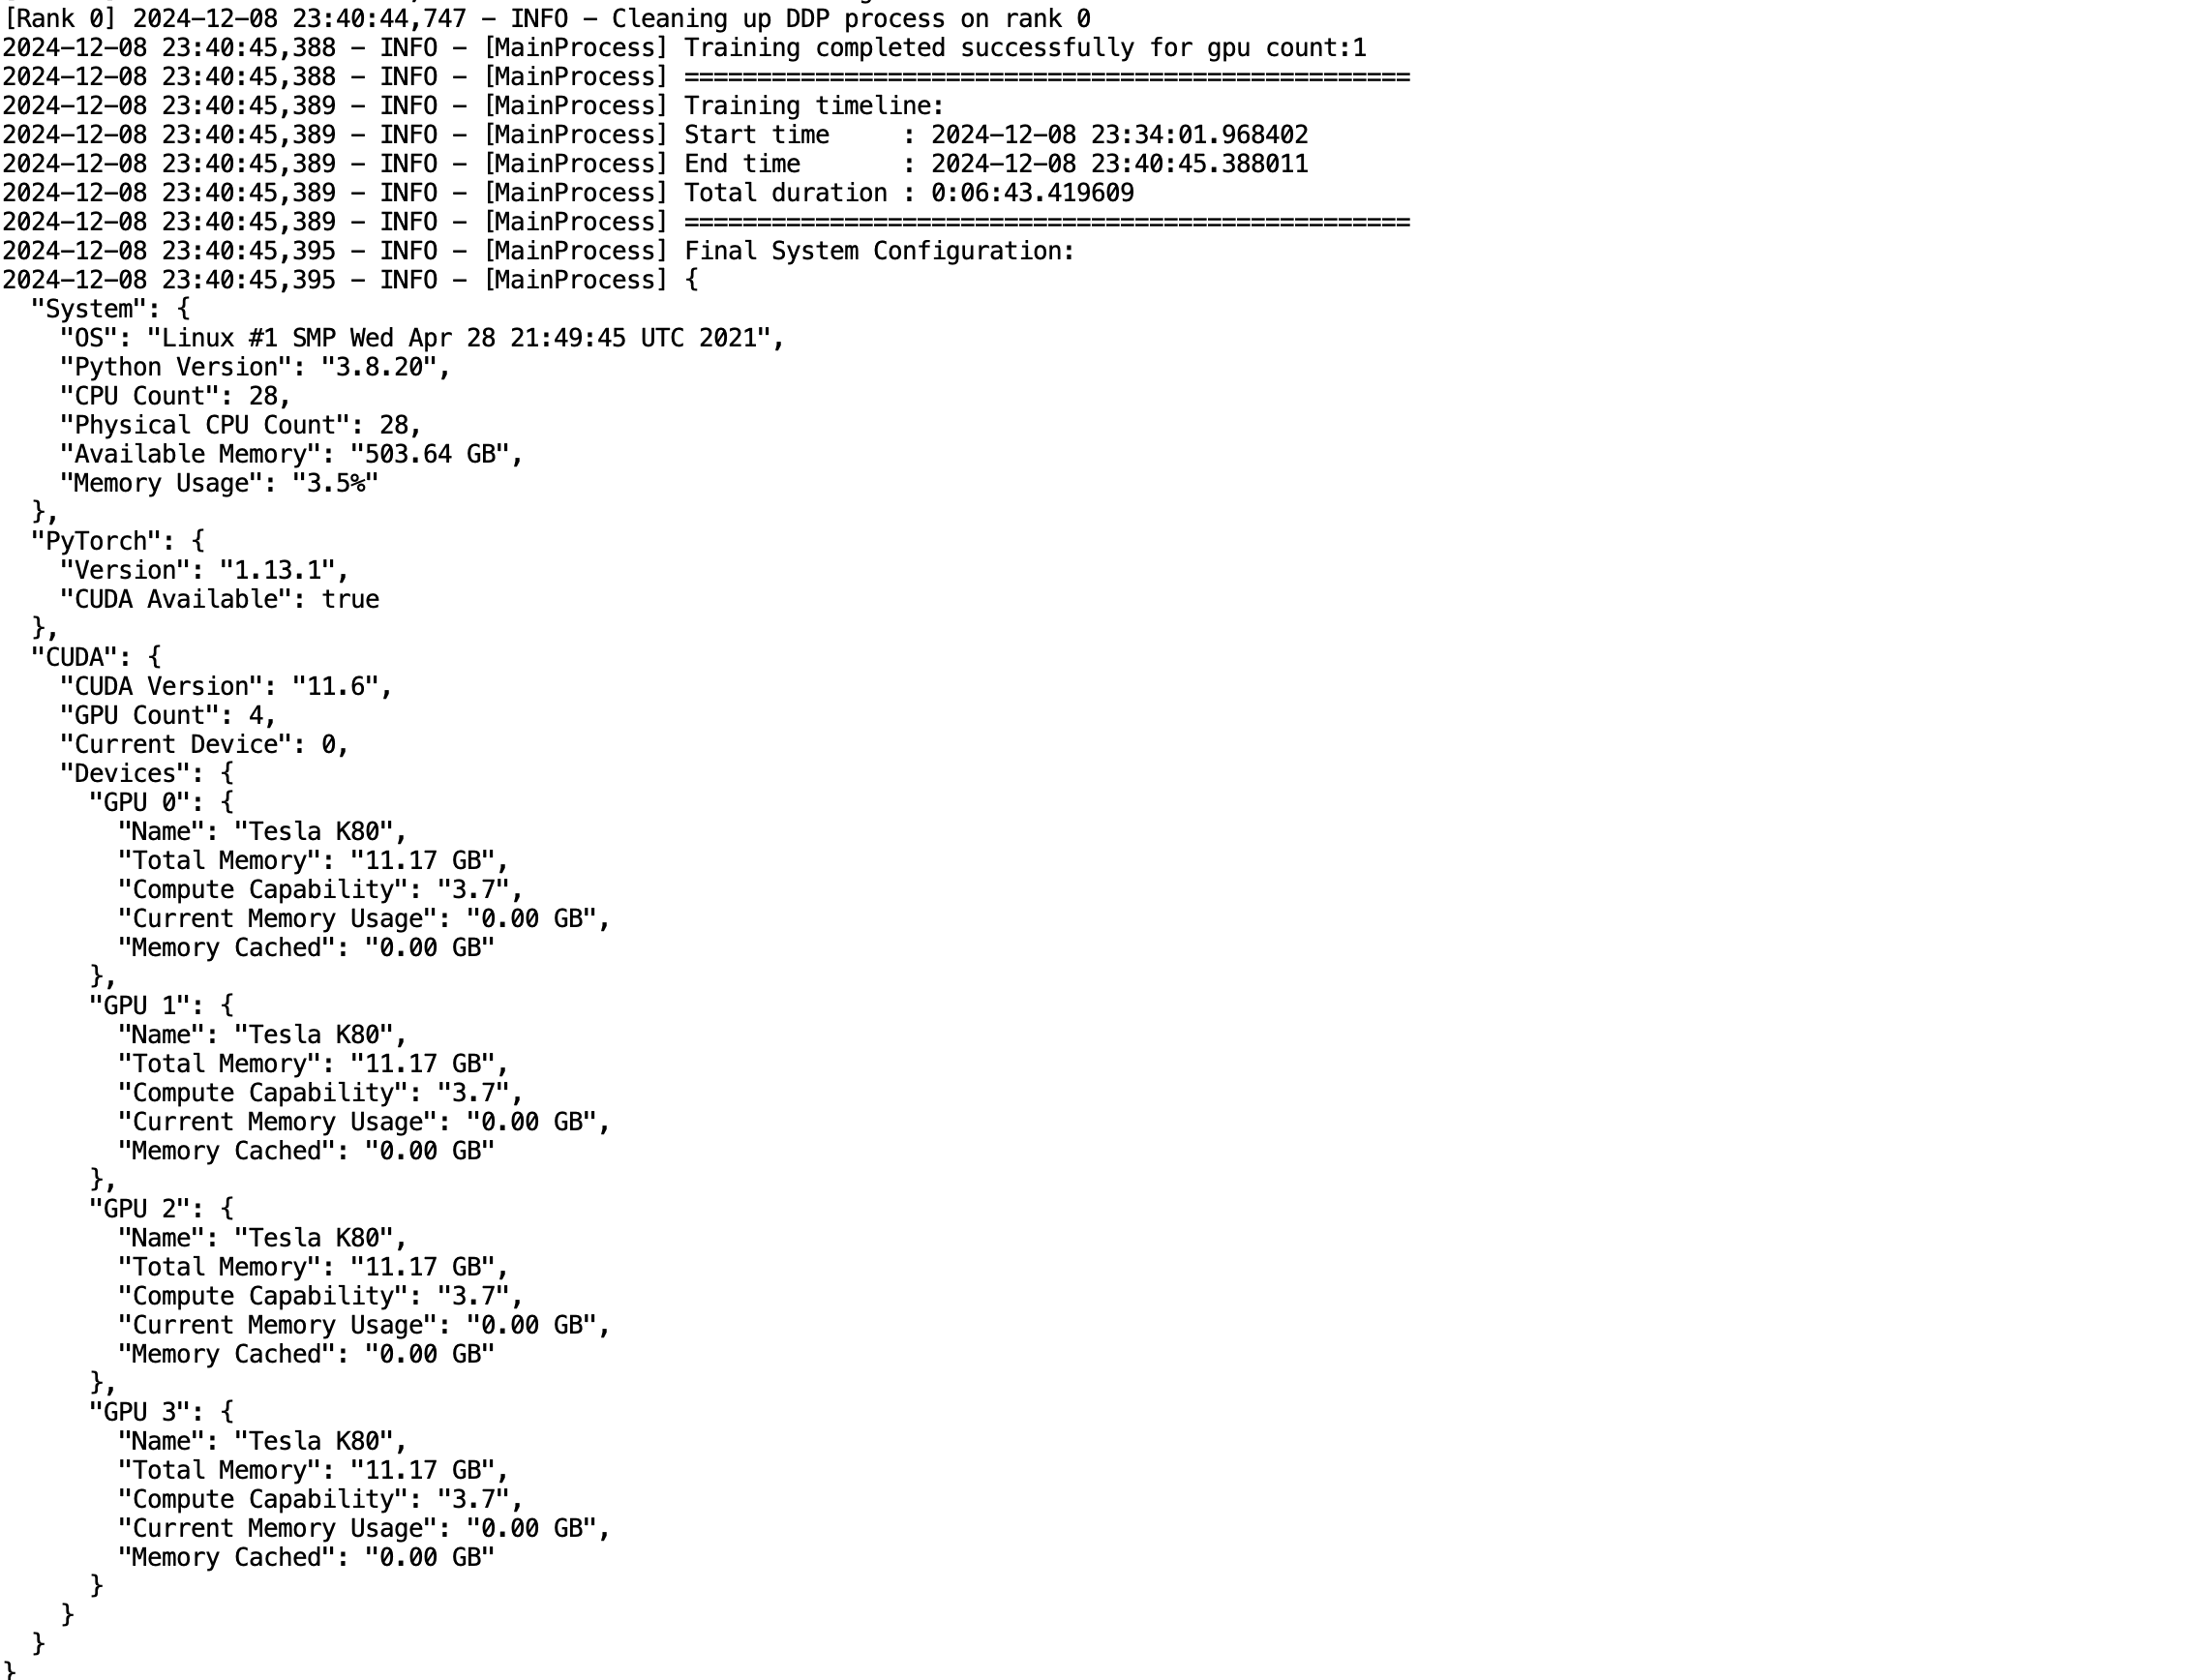

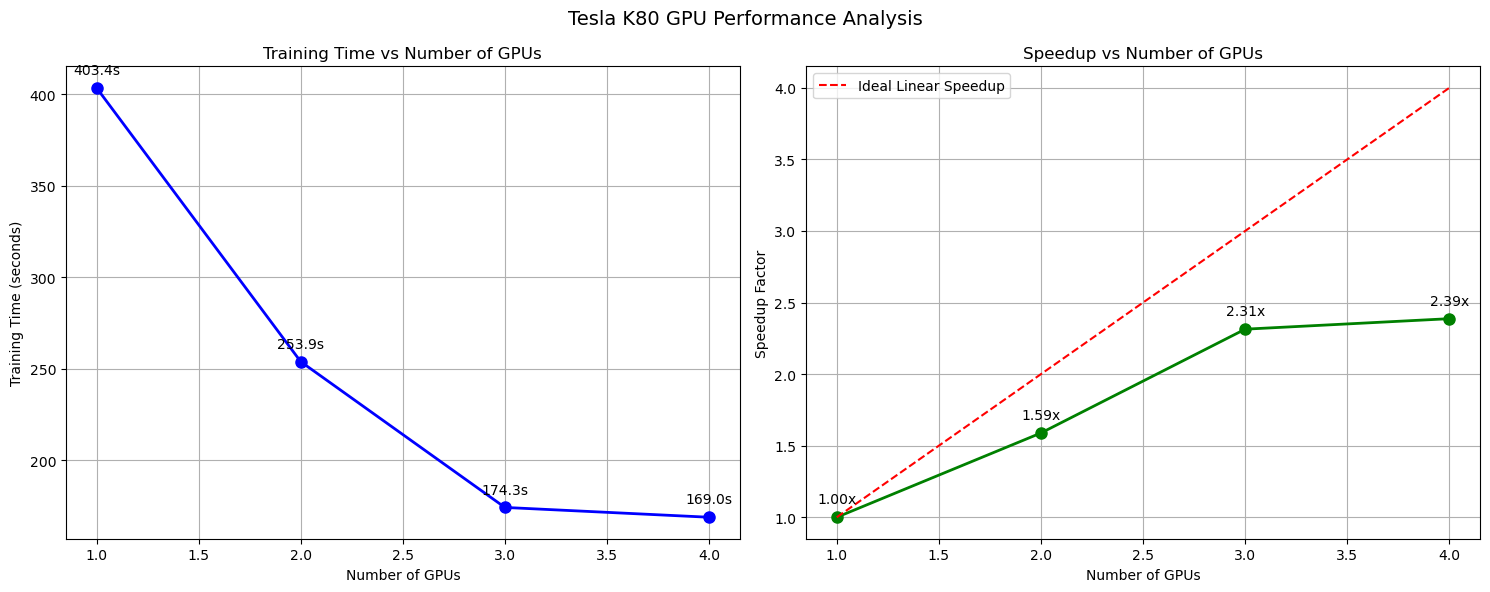


Performance Summary:
--------------------------------------------------
GPU Count  |   Time (s)   |   Speedup    |  Efficiency 
--------------------------------------------------
    1      |    403.41    |     1.00     |    100.0   %
    2      |    253.93    |     1.59     |    79.4    %
    3      |    174.35    |     2.31     |    77.1    %
    4      |    168.99    |     2.39     |    59.7    %


In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Your data
data = {
    "Tesla K80": {
        "1": "0:06:43.41",
        "2": "0:04:13.925",
        "3": "0:02:54.347",
        "4": "0:02:48.988"
    }
}

def time_to_seconds(time_str):
    # Convert time string to seconds
    minutes, rest = time_str.split(':')[1:]
    minutes = float(minutes)
    seconds = float(rest)
    return minutes * 60 + seconds

# Process data
gpu_counts = []
times = []
speedups = []

base_time = None
for gpu_count, time_str in data["Tesla K80"].items():
    seconds = time_to_seconds(time_str)
    if base_time is None:
        base_time = seconds
    
    gpu_counts.append(int(gpu_count))
    times.append(seconds)
    speedups.append(base_time / seconds)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Training Time
ax1.plot(gpu_counts, times, 'b-o', linewidth=2, markersize=8)
ax1.set_xlabel('Number of GPUs')
ax1.set_ylabel('Training Time (seconds)')
ax1.set_title('Training Time vs Number of GPUs')
ax1.grid(True)

# Add time labels on points
for i, time in enumerate(times):
    ax1.annotate(f'{time:.1f}s', 
                (gpu_counts[i], times[i]), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

# Plot 2: Speedup
ax2.plot(gpu_counts, speedups, 'g-o', linewidth=2, markersize=8)
ax2.set_xlabel('Number of GPUs')
ax2.set_ylabel('Speedup Factor')
ax2.set_title('Speedup vs Number of GPUs')
ax2.grid(True)

# Add speedup labels on points
for i, speedup in enumerate(speedups):
    ax2.annotate(f'{speedup:.2f}x', 
                (gpu_counts[i], speedups[i]), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

# Add ideal speedup line
ideal_speedup = np.array(gpu_counts)
ax2.plot(gpu_counts, ideal_speedup, 'r--', label='Ideal Linear Speedup')
ax2.legend()

plt.suptitle('Tesla K80 GPU Performance Analysis', fontsize=14)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPerformance Summary:")
print("-" * 50)
print(f"{'GPU Count':^10} | {'Time (s)':^12} | {'Speedup':^12} | {'Efficiency':^12}")
print("-" * 50)
for i, gpu_count in enumerate(gpu_counts):
    efficiency = (speedups[i] / gpu_count) * 100
    print(f"{gpu_count:^10} | {times[i]:^12.2f} | {speedups[i]:^12.2f} | {efficiency:^11.1f}%")

# Mixed Precesion Comparison on T4
## With mixed precesion
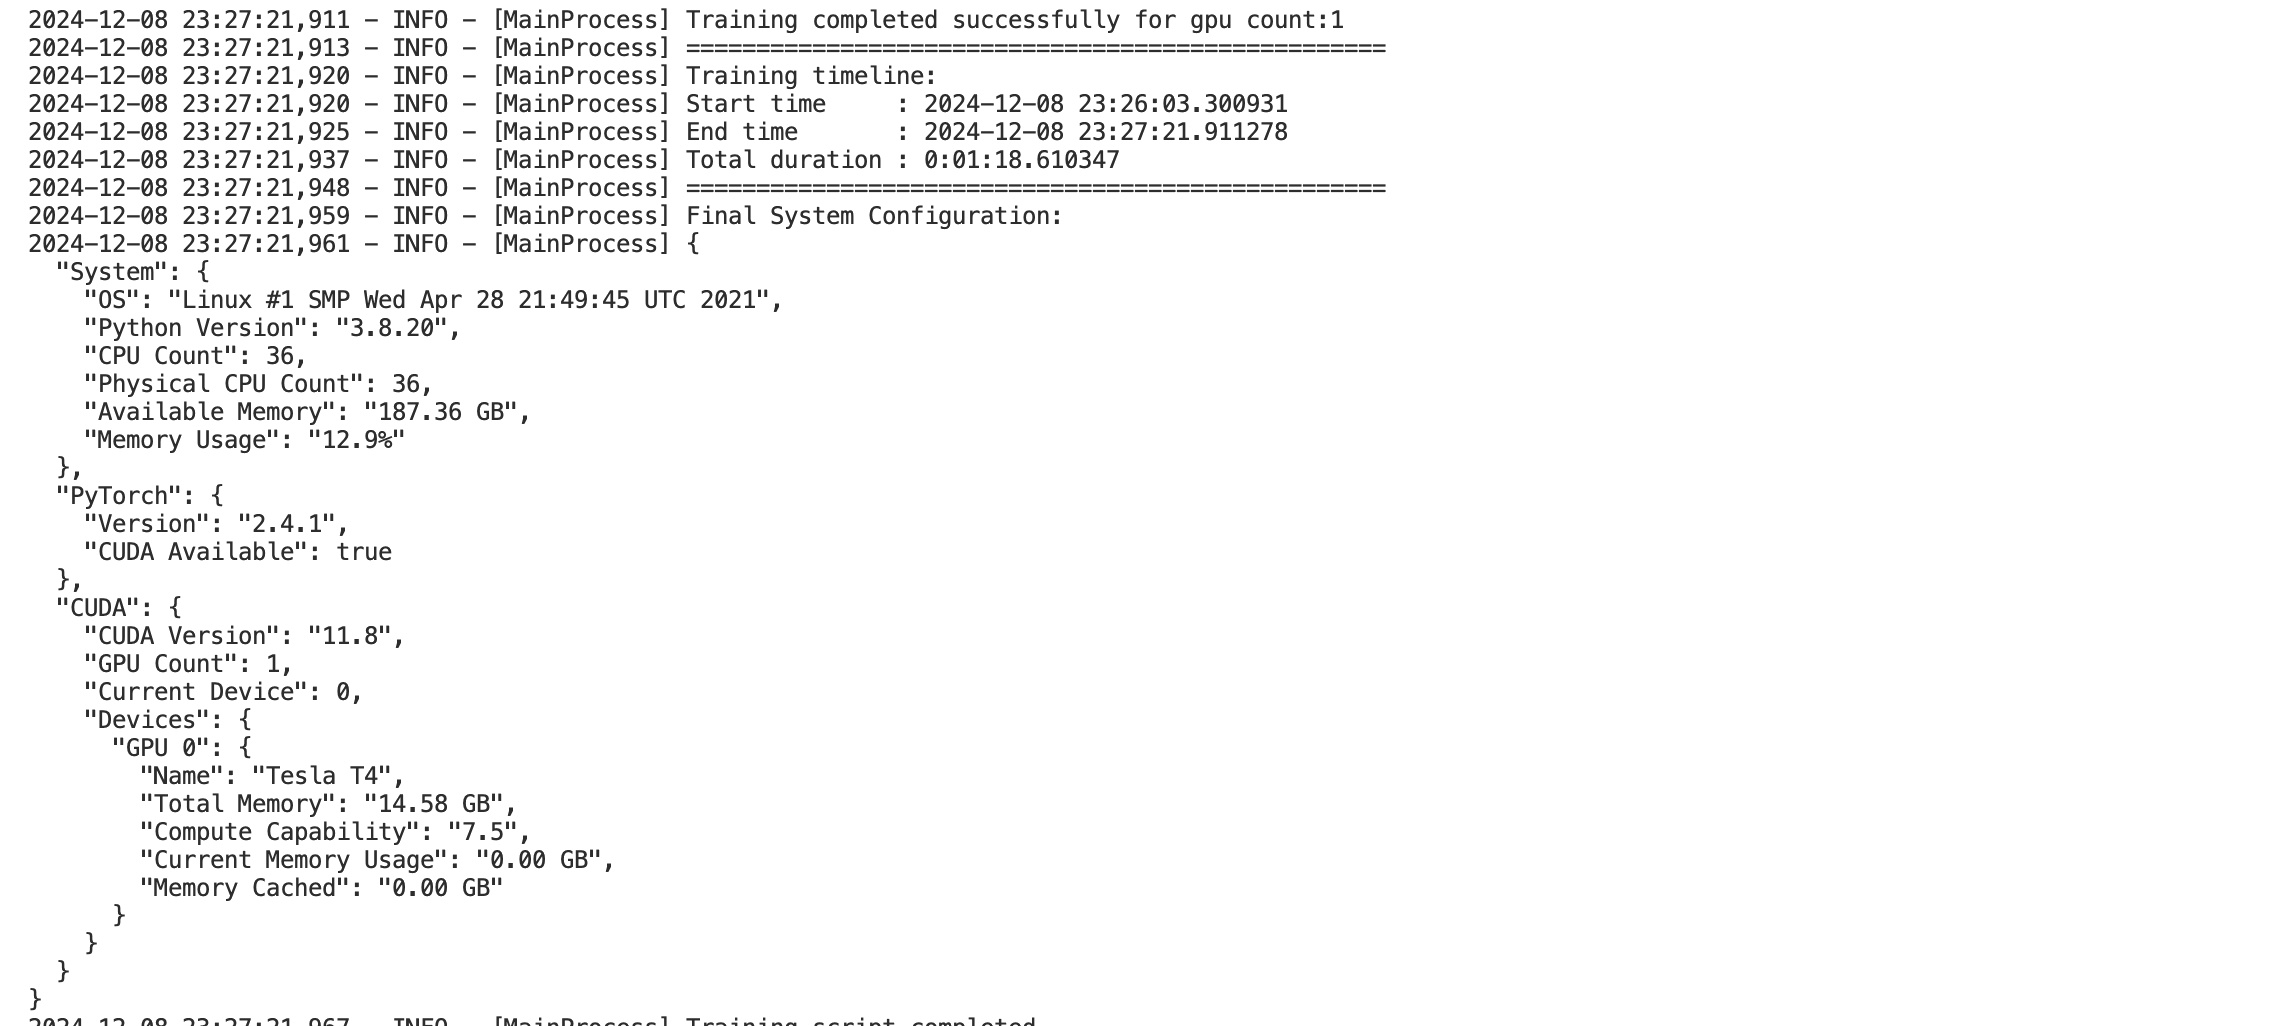
## Without mixed precesion
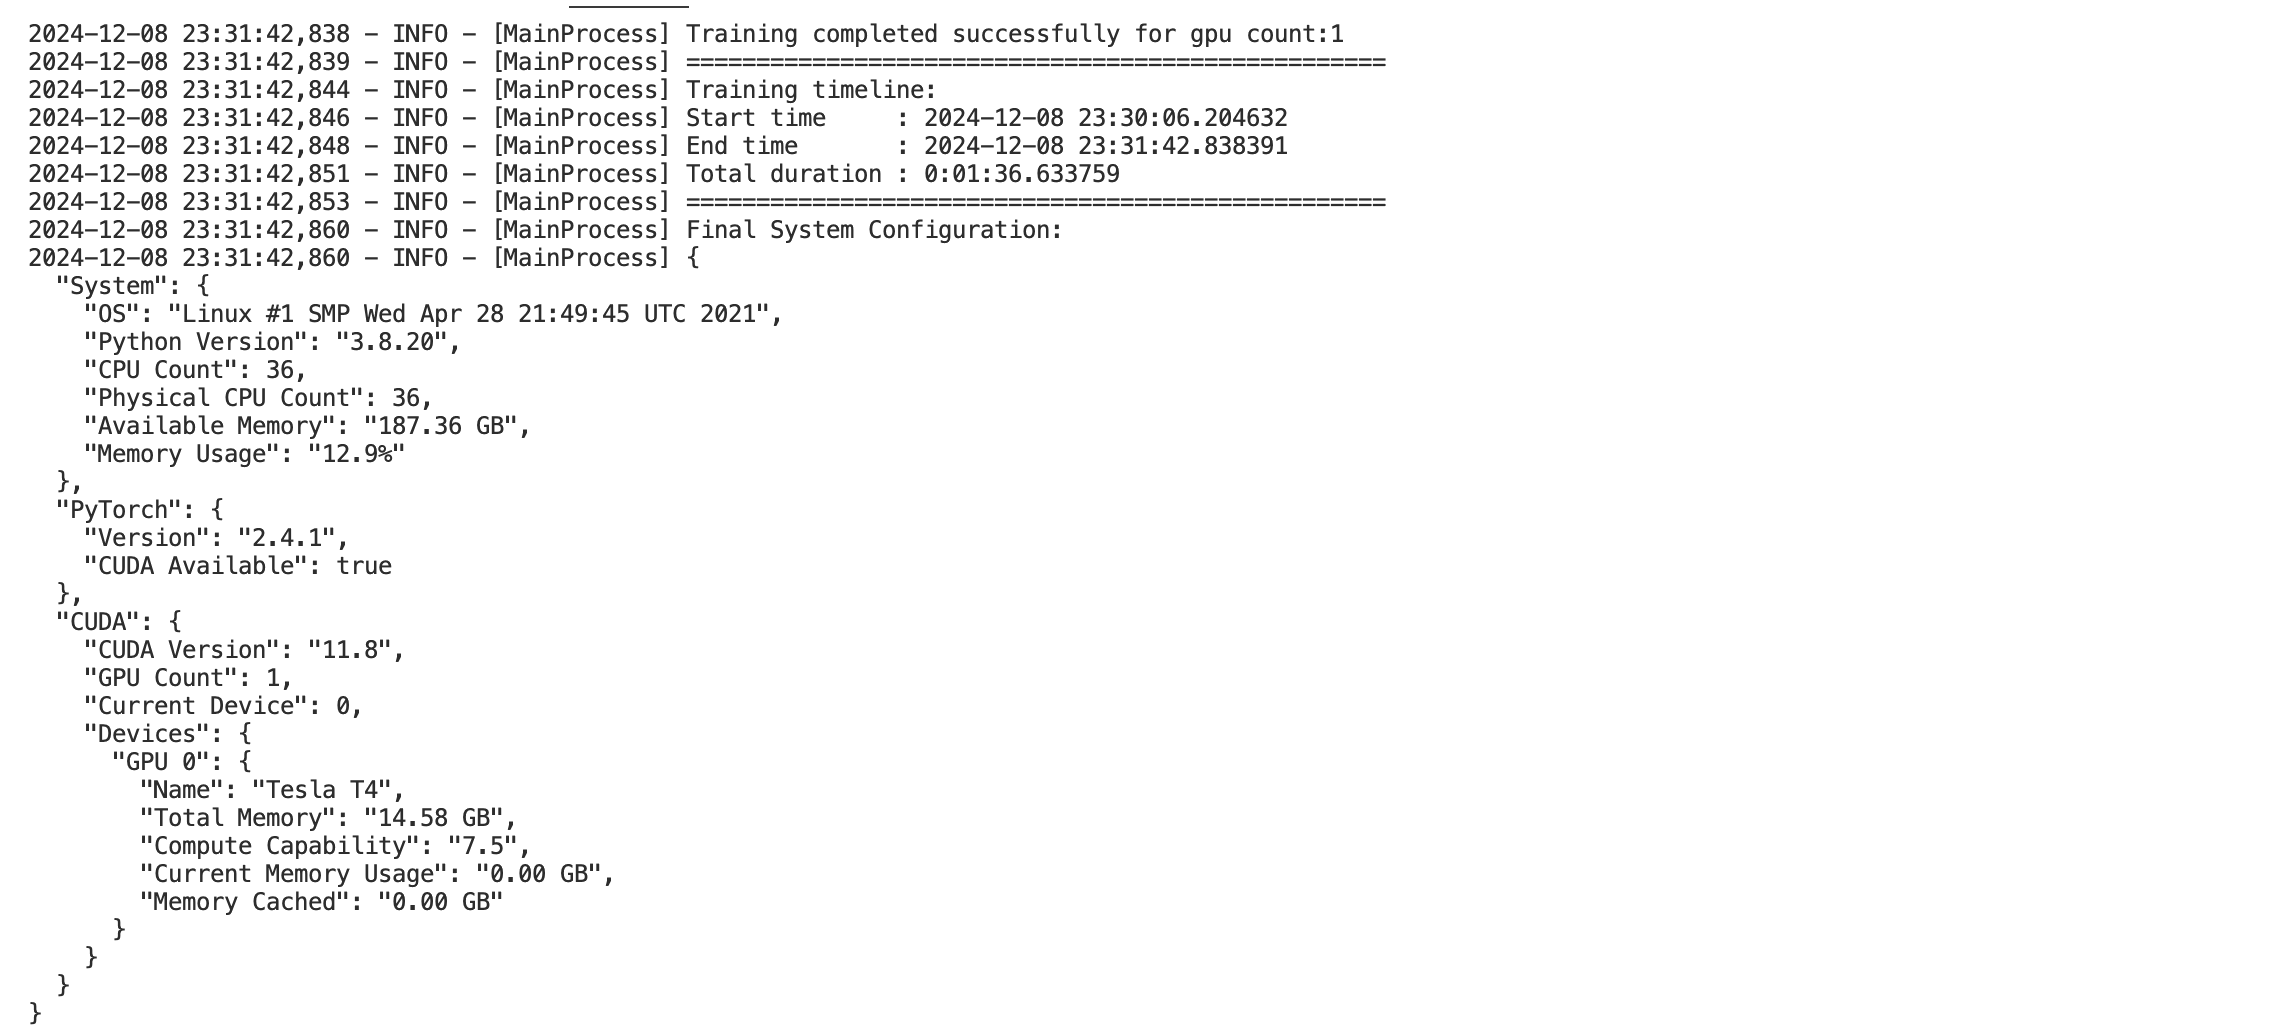

/tmp/ipykernel_3131/1000857023.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_3131/1000857023.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Type', y='Time (seconds)', data=df, palette='viridis')


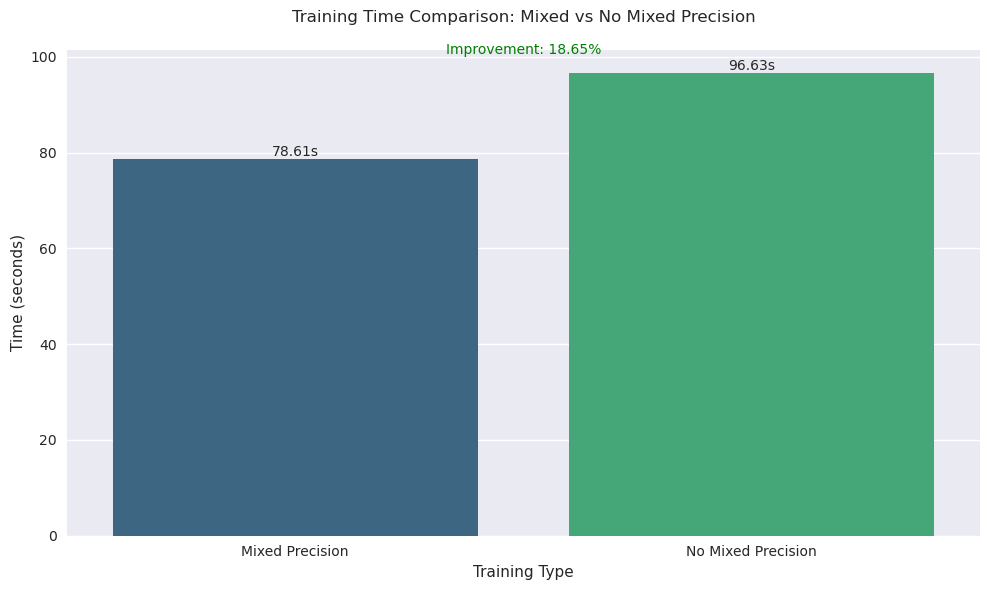


Training Time Statistics:
--------------------------------------------------
Mixed Precision:     78.61 seconds
No Mixed Precision:  96.63 seconds
Time Saved:         18.02 seconds
Percentage Faster:   18.65%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create data
data = {
    'Training Type': ['Mixed Precision', 'No Mixed Precision'],
    'Time (seconds)': [78.6103, 96.63]  # Converted from MM:SS.MS format
}

df = pd.DataFrame(data)

# Set style and figure size
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x='Training Type', y='Time (seconds)', data=df, palette='viridis')

# Customize plot
plt.title('Training Time Comparison: Mixed vs No Mixed Precision', pad=20)
plt.xlabel('Training Type')
plt.ylabel('Time (seconds)')

# Add value labels on top of bars
for i, v in enumerate(df['Time (seconds)']):
    plt.text(i, v, f'{v:.2f}s', ha='center', va='bottom')

# Add percentage improvement
improvement = ((96.63 - 78.6103) / 96.63) * 100
plt.text(0.5, 100, f'Improvement: {improvement:.2f}%', ha='center', va='bottom', color='green')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print statistics
print("\nTraining Time Statistics:")
print("-" * 50)
print(f"Mixed Precision:     {78.6103:.2f} seconds")
print(f"No Mixed Precision:  {96.63:.2f} seconds")
print(f"Time Saved:         {96.63 - 78.6103:.2f} seconds")
print(f"Percentage Faster:   {improvement:.2f}%")

# Code explaination

The DDP logic is triggered from the DDP_MAIN.py file with the below terminal command:

`python DDP_MAIN.py --config ./configs/ddp_config.yaml --num-gpus 1`

1. DDP Setup and Training

```python
def train_ddp(self, rank: int, world_size: int):
    """Training process for each GPU"""
    try:
        # Setup process-specific logging
        self._setup_process_logging(rank)
        
        # Initialize process group with appropriate backend
        backend = 'nccl' if (torch.cuda.is_available() and not self.is_old_gpu) else 'gloo'
        setup_ddp(rank, world_size)
        
        # Setup model with DDP wrapper
        model = self._setup_model(rank)
        train_loader = self._setup_dataloader(rank, world_size)
        
        # Train and finalize
        training_history, model_name = trainer.train(model, train_loader)
    finally:
        cleanup_ddp()
```

2. DDP Model Setup:

```python
def _setup_model(self, rank: int):
    """Setup model with DDP wrapper"""
    model = LaneDetectionModel(
        num_classes=self.config['model']['num_classes'],
        backbone=self.config['model']['backbone'],
        pretrained=self.config['model']['pretrained']
    )
    
    if torch.cuda.is_available():
        model = model.cuda(rank)
    
    # DDP wrapper configuration
    ddp_kwargs = {
        "device_ids": [rank],
        "find_unused_parameters": True,
        "gradient_as_bucket_view": self.use_persistent_workers
    }
    
    model = torch.nn.parallel.DistributedDataParallel(model, **ddp_kwargs)
    return model
```

3. Distributed DataLoader Setup:

```python
def _setup_dataloader(self, rank: int, world_size: int):
    """Setup data loader with distributed sampler"""
    train_dataset = LaneDataset(
        dataset_path=self.config['dataset']['path'],
        train=True,
        size=tuple(self.config['dataset']['image_size'])
    )
    
    # Create distributed sampler
    sampler = torch.utils.data.distributed.DistributedSampler(
        train_dataset,
        num_replicas=world_size,
        rank=rank,
        shuffle=True
    )
    
    # Configure loader with distributed settings
    loader_kwargs = {
        "batch_size": self.config['dataset']['batch_size'] // world_size,
        "num_workers": self.config['dataset']['num_workers'],
        "pin_memory": not self.is_old_gpu,
        "sampler": sampler
    }
    
    return torch.utils.data.DataLoader(train_dataset, **loader_kwargs)
```

4. Multi-GPU Training Launch:

```python
def main(config_path: str, num_gpus: int):
    start_time = datetime.now()
    logging.info(f"Script started at: {start_time}")
    
    try:
        # Validate GPU availability
        if not torch.cuda.is_available():
            raise RuntimeError("CUDA is not available. DDP requires GPU support.")
        
        if num_gpus > torch.cuda.device_count():
            raise ValueError(f"Requested {num_gpus} GPUs but only {torch.cuda.device_count()} available")
        
        ddp_trainer = DDPTrainer(config_path)
        
        # Spawn processes for each GPU
        torch.multiprocessing.spawn(
            ddp_trainer.train_ddp,
            args=(num_gpus,),
            nprocs=num_gpus,
            join=True
        )
        
        # Log training duration
        end_time = datetime.now()
        duration = end_time - start_time
        logging.info(f"Training completed successfully for gpu count: {num_gpus}")
        logging.info("=" * 50)
        logging.info(f"Training timeline:")
        logging.info(f"Start time     : {start_time}")
        logging.info(f"End time       : {end_time}")
        logging.info(f"Total duration : {duration}")
        logging.info("=" * 50)
        
    except Exception as e:
        logging.error("Training failed:", exc_info=True)
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        raise
```

Key Implementation Details:

1. **Process Management**:
   - Uses `torch.multiprocessing.spawn` to create processes for each GPU
   - Each process gets a unique rank and knows the total world size
   - Processes are joined at the end to ensure synchronization

2. **DDP Configuration**:
   - Uses NCCL backend for modern GPUs and falls back to Gloo for older ones
   - Wraps the model in DistributedDataParallel for gradient synchronization
   - Configures process groups for inter-GPU communication

3. **Data Distribution**:
   - Uses DistributedSampler to split data across GPUs
   - Adjusts batch size based on number of GPUs
   - Handles data loading efficiently with proper worker configuration

4. **Timing and Logging**:
   - Captures start and end times for the entire training process
   - Logs comprehensive timing information including total duration
   - Maintains separate logs for each GPU process
   - Provides detailed system information at start and end

This implementation provides a robust framework for distributed training across multiple GPUs while maintaining proper synchronization and error handling.